C:\Users\Lalit\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 29, 32)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 14, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 13, 64)         │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 6, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 384)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 28,961 (113.13 KB)

 Trainable params: 28,961 (113.13 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.7501 - loss: 0.6211 - val_accuracy: 0.9011 - val_loss: 0.3568
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9281 - loss: 0.2846 - val_accuracy: 0.9121 - val_loss: 0.2319
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9533 - loss: 0.1583 - val_accuracy: 0.9011 - val_loss: 0.1957
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9515 - loss: 0.1227 - val_accuracy: 0.9121 - val_loss: 0.1658
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9642 - loss: 0.1073 - val_accuracy: 0.9121 - val_loss: 0.1551
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.9650 - loss: 0.0956 - val_accuracy: 0.9121 - val_loss: 0.1427
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9781 - loss: 0.0667 - val_accuracy: 0.9121 - val_loss: 0.1478
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9797 - loss: 0.0656 - val_accuracy: 0.9231 - v

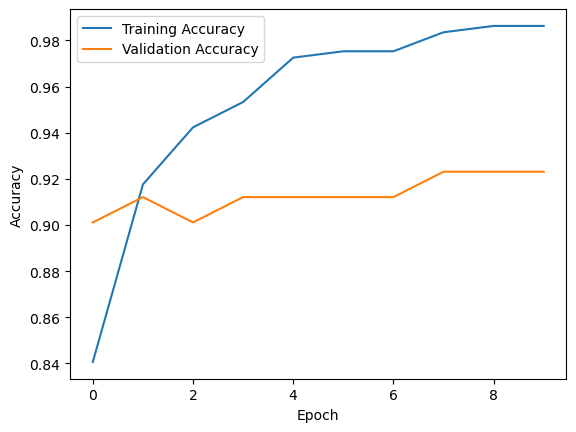

In [2]:
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_breast_cancer()
X = data.data  # Features (569 samples, 30 features)
y = data.target  # Labels (0 = malignant, 1 = benign)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data to have zero mean and unit variance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshape the data to fit into a 1D CNN (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Define the CNN model
model = tf.keras.models.Sequential()

# First 1D Convolutional Layer + MaxPooling
model.add(tf.keras.layers.Conv1D(32, kernel_size=2, activation='relu', input_shape=(30, 1)))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

# Second 1D Convolutional Layer + MaxPooling
model.add(tf.keras.layers.Conv1D(64, kernel_size=2, activation='relu'))
model.add(tf.keras.layers.MaxPooling1D(pool_size=2))

# Flatten the output for the fully connected layer
model.add(tf.keras.layers.Flatten())

# Fully connected layer
model.add(tf.keras.layers.Dense(64, activation='relu'))

# Output layer with sigmoid activation for binary classification
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Print the model summary to display the architecture
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)
print(f'Test Accuracy: {test_accuracy:.2f}')

# Plot training and validation accuracy
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
